In [ ]:
## 패키지 설치
pip install nltk konlpy pandas networkx gensim

In [ ]:
## 코랩 한글 깨짐 현상 해결
## [방법 1]
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
import pandas as pd
from pandas import DataFrame

In [9]:
## 1. 
## [함수 정의] #################################################################
## 탐색하고자 하는 대상이 단어인가 문서인가에 따라 TF와 DF로 나뉨 ##############
## tf (term frequency) : 1개 문서 내 특정 단어 빈도
def tf(term, document):
    return document.count(term)


docs = []

## df (document frequency) : 특정 단어가 나타나는 문서의 개수
def df(term):
    df = 0
    for doc in docs:
        df += term in doc
    return df

## IDF (Inverse Document Frequency) : DF에서 역수 변환
## d : 문서, t : 단어, n : 문서 총 개수
def idf(term):
    return log(N/(df(term)+1))

## tf_idf : 많이 등장하는 단어에 패널티를 주고 단어 빈도의 스케일을 맞춰주는 방법
## 수식으로는 TF-IDF = tf*idf
def tf_idf(term, document):
    return tf(term, document) * idf(term)

In [ ]:
####################################################################################################
## Code start ######################################################################################
####################################################################################################
from nltk.tokenize import sent_tokenize
from konlpy.corpus import kolaw
from konlpy.tag import *
from pandas import DataFrame
from math import log

import konlpy
import nltk
import pandas as pd

## 파일 읽어오기 #######################################################
## 1) 코랩에 파일 업로드
# from google.colab import files
# myfile = files.upload()

## 2) 3기 csv 파일 읽어오기
current_work = 'time_3.csv'

table_3 = pd.read_csv(current_work)
# table_3
#type(table_3)        ## DataFrame

In [11]:
row, col = table_3.shape

news_content = table_3['기사제목']  ## Object
#news_content

news_content_list = list(news_content)
# news_content_list

## 자료형 변환 : list -> str
# news_content_str = ' '.join(news_content_list)
news_content_str = ' '.join(map(str, news_content_list))

In [5]:
'''
nouns : 명사 추출
morphs : 형태소 추출
pos : 품사 부착
'''
komoran = Komoran()

## 메모리 설정
# konlpy.jvm.init_jvm(jvmpath=None, max_heap_size=1024)

## 형태소와 품사 추출 ######################################################################
# pos = komoran.pos(news_content_str)
# pos

'''
NNB: '의존 명사',
NNG: '일반 명사',
NNP: '고유 명사',
NP : '대명사',
'''

## 7분 29초 소요 ############################################################################

"\nNNB: '의존 명사',\nNNG: '일반 명사',\nNNP: '고유 명사',\nNP : '대명사',\n"

In [ ]:
kopus = []
token_result = []

#############################################################################################################
## 불용어 처리 : 단어 제외하기 ########################################################################

stop_word = ['로나', '19', '째 코', '10', '20', '11', '100', '진자', '50', '위해', '00', '30', '40', '60', '바이']

for line in news_content_list:
    pos = komoran.pos(line)
    NN = [element[0] for element in pos if element[1] in ('NNP', 'NNG')]
    # print('NN >>', NN)

    NN_copy = NN[:]

    for N in NN:
      # print('N >>', N)

      if N in stop_word:
        NN_copy.remove(N)

      if len(N) == 1:
        NN_copy.remove(N)

    # print('NN : 불용어 삭제 후 >>', NN)

    token_result.append(NN_copy)
    kopus.extend(NN_copy)
        
# print('=' * 100)    
# kopus


In [7]:
#######################################################################################################
# docs = list(test_file['기사내용'])
docs = news_content_list

# ## 총 문서 수
# N = len(docs)
N = row

## 중복 제거한 형태소 #################################################################################
voca = list(set(kopus))
# print('중복 제거한 형태소 개수 >>', len(voca))
# voca

# print(docs)
print('docs 수 >>', len(docs))
print('N 수 >>', N)
print('형태소 개수 : voca 수 >>', len(voca))

## IDF -------------------------------------------------------------------------------
# IDE_result = []

# for t in final_voca:
#     IDE_result.append(idf(t))

# IDE_result

# idf_ = pd.DataFrame(IDE_result, index=final_voca, columns=["IDF"])
# idf_
# idf_.IDF.sort_values(ascending=False)[:30]

## tf_idf -----------------------------------------------------------------------------
TF_IDE_result = []

for word in voca:
#     print(word)
    TF_IDE_result.append(tf_idf(word, news_content_str))
    
# TF_IDE_result

tf_idf_ = pd.DataFrame(TF_IDE_result, index=voca, columns=["IDF"])
# tf_idf_

tf_idf_final = tf_idf_.sort_values(by='IDF', ascending=False)[:30]  ## 최종 30개 형태소 추출
tf_idf_final.to_csv(f'{current_work}_tf_idf.csv')
print(f'{current_work}_tf_idf.csv 파일 저장 완료!!')

docs 수 >> 108000
N 수 >> 108000
형태소 개수 : voca 수 >> 16825
time_3.csv_tf_idf.csv 파일 저장 완료!!


In [16]:
tf_idf_final

,IDF
확진,38726.378011
백신,34114.191885
접종,29355.348215
신규,25608.623093
검사,18512.080132
발생,17787.443595
감염,15490.415250
확산,14403.702685
지원,14234.125584
추가,13771.156067


In [8]:
tf_idf_final.index

Index(['확진', '백신', '접종', '신규', '검사', '발생', '감염', '확산', '지원', '추가', '예방', '방역',
       '치료', '누적', '속보', '극복', '종합', '사망', '서울', '대응', '국내', '치료제', '지역', '키트',
       '진단', '병원', '정부', '의료', '센터', '자가'],
      dtype='object')

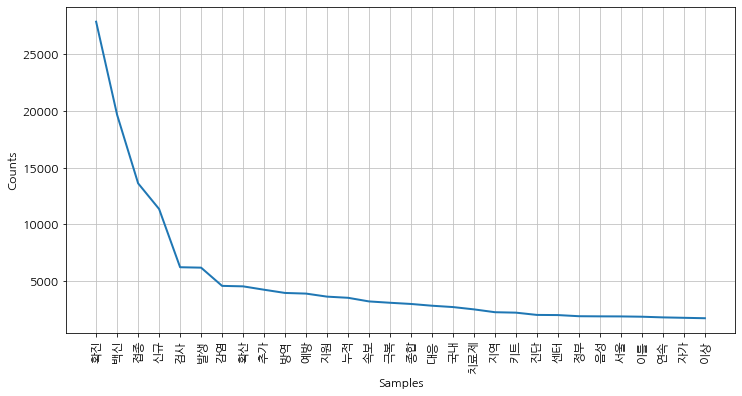

워드 클라우드 저장 완료 !!


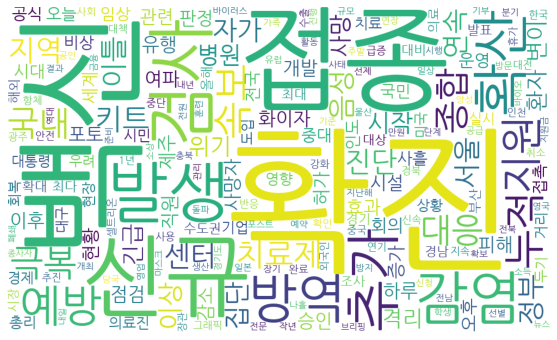

In [19]:
############################################################################################
## koNLPy의 형태소 분석기와 NLTK의 Text 클래스를 결합하여 NLTK 기능을 사용할 수도 있다.
############################################################################################
from nltk import Text
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# plt.rcParams['font.family'] ='NanumGothic'
plt.rc('font', family='NanumGothic') ## 글꼴
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.xlabel('키워드')

kopus_corona_except = [k for k in kopus if k != '코로나']

text = Text(kopus_corona_except, name="단어")

#text.vocab()
chart = text.plot(30)

# chart.savefig(f'{current_work}_chart.png')
# print('이미지 저장 완료!!')

##############################################################################################
## wordcloud #################################################################################
##############################################################################################
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

plt.rc('font', family='NanumGothic') ## 글꼴
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(text.vocab()))
plt.axis("off")

plt.savefig(f'{current_work}_wordcloud.png')
print('워드 클라우드 저장 완료 !!')

In [20]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

## Word2Vec 훈련시키기 #####################################################################################
#type(kopus_result) ##list
# word2vec_model = Word2Vec(sentences=kopus_result, vector_size=100, window=5, min_count=5, workers=4, sg=0)
model = Word2Vec(sentences=token_result, size=100, window=5, min_count=2, workers=4, sg=1)


In [21]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(11954, 100)

In [22]:
model.wv.vectors

array([[ 0.41718492,  0.28135777, -0.24084257, ..., -0.205082  ,
        -0.2619833 ,  0.28458023],
       [ 0.07237173,  0.45520315, -0.29228026, ...,  0.2900139 ,
         0.54028636,  1.0082042 ],
       [ 0.5166302 , -0.3467793 ,  0.13857199, ...,  0.3515973 ,
        -0.22008555,  0.36105466],
       ...,
       [ 0.0139684 , -0.02591898, -0.09167755, ...,  0.05993654,
        -0.01237144,  0.04828808],
       [ 0.02911966, -0.05339105, -0.04246346, ...,  0.05435938,
        -0.00116086,  0.04725512],
       [ 0.04670115, -0.06309516, -0.04130678, ...,  0.071564  ,
         0.01336592,  0.05857421]], dtype=float32)

In [ ]:
## Word2Vec ################################################################
## model.wv.most_similar: 입력한 단어에 대해서 가장 유사한 단어들 출력
############################################################################
model_result = model.wv.most_similar("코로나")
print(model_result)

[('분수령', 0.5674061179161072), ('턱밑', 0.5660591125488281), ('대가', 0.5569710731506348), ('서울아산병원', 0.5540550351142883), ('5월 13일', 0.5538355112075806), ('영남', 0.5528497695922852), ('최소', 0.543728232383728), ('이달', 0.543683648109436), ('자리', 0.5368099808692932), ('2월 19일', 0.5362445116043091)]


In [24]:
model.wv.most_similar("코로나")

[('분수령', 0.5674061179161072),
 ('턱밑', 0.5660591125488281),
 ('대가', 0.5569710731506348),
 ('서울아산병원', 0.5540550351142883),
 ('5월 13일', 0.5538355112075806),
 ('영남', 0.5528497695922852),
 ('최소', 0.543728232383728),
 ('이달', 0.543683648109436),
 ('자리', 0.5368099808692932),
 ('2월 19일', 0.5362445116043091)]

In [25]:
## 코로나와 관련된 TOP 30 추출
model.wv.most_similar('코로나', topn=30)

[('분수령', 0.5674061179161072),
 ('턱밑', 0.5660591125488281),
 ('대가', 0.5569710731506348),
 ('서울아산병원', 0.5540550351142883),
 ('5월 13일', 0.5538355112075806),
 ('영남', 0.5528497695922852),
 ('최소', 0.543728232383728),
 ('이달', 0.543683648109436),
 ('자리', 0.5368099808692932),
 ('2월 19일', 0.5362445116043091),
 ('초반', 0.5342395305633545),
 ('한자리', 0.5333825945854187),
 ('하나', 0.5331757068634033),
 ('눈앞', 0.5330095291137695),
 ('박성광', 0.5326651334762573),
 ('전체', 0.5324903130531311),
 ('11월 20일', 0.531577467918396),
 ('가야', 0.5312777757644653),
 ('금천구', 0.5311245322227478),
 ('울산광역시', 0.5293408036231995),
 ('내외', 0.5292656421661377),
 ('위중', 0.5288670063018799),
 ('170', 0.5285748243331909),
 ('모레', 0.5272853374481201),
 ('금산', 0.527086079120636),
 ('제주국제공항', 0.5268559455871582),
 ('개시', 0.5267459750175476),
 ('4월 8일', 0.526574969291687),
 ('3월 10일', 0.5257887244224548),
 ('카오', 0.5248644351959229)]

In [15]:
keyword = '백신'

table_3.기사제목[table_3.기사제목.str.contains(keyword)][:50]

1                       바이오엔테크 CEO "코로나19 백신 12월 공급 가능성"
10                       화이자 "美FDA에 코로나19 백신 긴급사용 승인 신청"
24                                 코로나19 백신, 한국에는 언제 풀릴까
31                           코로나19 백신이 온다…“한국은 정중동(靜中動)”
37                 IMF 총재 "코로나19 백신 가시화...경제 경로 여전히 어려워"
38                       옥스퍼드대 코로나19 백신, 고령층에도 강력한 면역 반응
55                     이인영 "코로나 백신·치료제 개발되면 한반도에 새로운 여건"
66                            정부 “코로나19 백신 내년 하반기 접종 예정”
68                     중국 시노백 코로나19 백신 브라질 첫 도착…1차 12만회분
72                    메르켈 "코로나19 백신 12월이나 내년초 유럽서 접종 가능"
92               '코로나19' 백신 유통 대비… 쥴릭파마, 아시아 냉장 저장 창고 확대
108                바이오엔테크 CEO "코로나19 백신, 12월 유통 가능성" 재언급
118                    이인영 "코로나 백신·치료제 개발되면 한반도에 새로운 여건"
120                    이인영 "코로나 백신·치료제 개발되면 한반도에 새로운 여건"
139                     英 옥스퍼드대 개발 코로나19 백신 "노령층도 효과 동일"
140                     바이오앤테크 CEO "코로나19 백신 12월 공급 가능성"
142                           정부 “코로나19 백신 내년 하반기 접종 예정”
144                    중국 시노백 코

In [12]:
keyword = '키트'

keyword_search = table_3.기사제목[table_3.기사제목.str.contains(keyword)]
print('개수 >>', len(keyword_search))
keyword_search


개수 >> 2198


325                             코로나19 백신 나오면 진단키트 회사들은?
809                     美식품의약국, 코로나19 '자가 테스트 키트' 사용 승인
815                     진도군, '코로나 우울' 극복 현장에 심리지원 키트 배포
968                      진도군, '코로나 심리지원 키트' 배포…심리상담도 실시
1234                      진도군, 코로나19 극복 지원 ‘심리지원 키트’ 배포
                              ...                      
107154            엑세스바이오 주가 2%↑..."코로나 항체진단키트 美 FDA 승인"
107279      美 MTJR, 코로나 진단키트 피씨엘에 110억 대 손해배상..업체 법적 대응
107313    진매트릭스, 독감부터 코로나19 변이 바이러스 까지 동시 진단하는 키트 국내...
107546      [특징주] 진매트릭스, 코로나19·독감 동시진단 키트 국내 시판 허가로 급등세
107702             KBO, 코로나19 방역 강화…“자가검사 키트 활용, 전수 조사”
Name: 기사제목, Length: 2198, dtype: object

In [ ]:
## 1. n-gram #######################################
token = list(tf_idf_final.index)
token_len = len(token)
n_gram = []

for idx, out_token in enumerate(token, 1):
    #print('out_token>>', out_token)
    
    if idx == token_len:
        break
        
    for in_token in token[idx:]:
        #print('\tin_token>>', in_token)
        n_gram.append((out_token, in_token))
        
n_gram        

# n_gram[:10]

[('확진', '백신'),
 ('확진', '접종'),
 ('확진', '신규'),
 ('확진', '검사'),
 ('확진', '발생'),
 ('확진', '감염'),
 ('확진', '확산'),
 ('확진', '지원'),
 ('확진', '추가'),
 ('확진', '예방'),
 ('확진', '방역'),
 ('확진', '치료'),
 ('확진', '누적'),
 ('확진', '속보'),
 ('확진', '극복'),
 ('확진', '종합'),
 ('확진', '사망'),
 ('확진', '서울'),
 ('확진', '대응'),
 ('확진', '국내'),
 ('확진', '치료제'),
 ('확진', '지역'),
 ('확진', '키트'),
 ('확진', '진단'),
 ('확진', '병원'),
 ('확진', '정부'),
 ('확진', '의료'),
 ('확진', '센터'),
 ('확진', '자가'),
 ('백신', '접종'),
 ('백신', '신규'),
 ('백신', '검사'),
 ('백신', '발생'),
 ('백신', '감염'),
 ('백신', '확산'),
 ('백신', '지원'),
 ('백신', '추가'),
 ('백신', '예방'),
 ('백신', '방역'),
 ('백신', '치료'),
 ('백신', '누적'),
 ('백신', '속보'),
 ('백신', '극복'),
 ('백신', '종합'),
 ('백신', '사망'),
 ('백신', '서울'),
 ('백신', '대응'),
 ('백신', '국내'),
 ('백신', '치료제'),
 ('백신', '지역'),
 ('백신', '키트'),
 ('백신', '진단'),
 ('백신', '병원'),
 ('백신', '정부'),
 ('백신', '의료'),
 ('백신', '센터'),
 ('백신', '자가'),
 ('접종', '신규'),
 ('접종', '검사'),
 ('접종', '발생'),
 ('접종', '감염'),
 ('접종', '확산'),
 ('접종', '지원'),
 ('접종', '추가'),
 ('접종', '예방'),
 ('접종', '방역'),
 ('접종', 

In [28]:
## 2. 어휘 동시 출현 빈도의 계수화 #######################################
co_occurrence = {}

for token_element in token_result:
    for n in n_gram:
        compare = set(token_element) & set(n)
        if len(compare) == 2:
            co_occurrence[n] = co_occurrence.get(n, 0) + 1
            
co_occurrence

{('감염', '국내'): 173,
 ('감염', '극복'): 15,
 ('감염', '누적'): 152,
 ('감염', '대응'): 53,
 ('감염', '방역'): 91,
 ('감염', '병원'): 127,
 ('감염', '사망'): 74,
 ('감염', '서울'): 165,
 ('감염', '센터'): 42,
 ('감염', '속보'): 108,
 ('감염', '예방'): 53,
 ('감염', '의료'): 26,
 ('감염', '자가'): 18,
 ('감염', '정부'): 40,
 ('감염', '종합'): 278,
 ('감염', '지역'): 373,
 ('감염', '지원'): 9,
 ('감염', '진단'): 24,
 ('감염', '추가'): 443,
 ('감염', '치료'): 19,
 ('감염', '치료제'): 19,
 ('감염', '키트'): 20,
 ('감염', '확산'): 435,
 ('검사', '감염'): 137,
 ('검사', '국내'): 94,
 ('검사', '극복'): 2,
 ('검사', '누적'): 12,
 ('검사', '대응'): 45,
 ('검사', '발생'): 80,
 ('검사', '방역'): 42,
 ('검사', '병원'): 81,
 ('검사', '사망'): 8,
 ('검사', '서울'): 123,
 ('검사', '센터'): 93,
 ('검사', '속보'): 83,
 ('검사', '예방'): 32,
 ('검사', '의료'): 31,
 ('검사', '자가'): 905,
 ('검사', '정부'): 37,
 ('검사', '종합'): 136,
 ('검사', '지역'): 117,
 ('검사', '지원'): 26,
 ('검사', '진단'): 562,
 ('검사', '추가'): 59,
 ('검사', '치료'): 6,
 ('검사', '치료제'): 2,
 ('검사', '키트'): 855,
 ('검사', '확산'): 84,
 ('국내', '병원'): 24,
 ('국내', '센터'): 2,
 ('국내', '의료'): 12,
 ('국내', '자가'): 77,


In [29]:
## 2. 어휘 동시 출현 빈도의 계수화 #######################################
co_occurrence = {}

for token_element in token_result:
    for n in n_gram:
        compare = set(token_element) & set(n)
        if len(compare) == 2:
            co_occurrence[n] = co_occurrence.get(n, 0) + 1
            
co_occurrence

{('감염', '국내'): 173,
 ('감염', '극복'): 15,
 ('감염', '누적'): 152,
 ('감염', '대응'): 53,
 ('감염', '방역'): 91,
 ('감염', '병원'): 127,
 ('감염', '사망'): 74,
 ('감염', '서울'): 165,
 ('감염', '센터'): 42,
 ('감염', '속보'): 108,
 ('감염', '예방'): 53,
 ('감염', '의료'): 26,
 ('감염', '자가'): 18,
 ('감염', '정부'): 40,
 ('감염', '종합'): 278,
 ('감염', '지역'): 373,
 ('감염', '지원'): 9,
 ('감염', '진단'): 24,
 ('감염', '추가'): 443,
 ('감염', '치료'): 19,
 ('감염', '치료제'): 19,
 ('감염', '키트'): 20,
 ('감염', '확산'): 435,
 ('검사', '감염'): 137,
 ('검사', '국내'): 94,
 ('검사', '극복'): 2,
 ('검사', '누적'): 12,
 ('검사', '대응'): 45,
 ('검사', '발생'): 80,
 ('검사', '방역'): 42,
 ('검사', '병원'): 81,
 ('검사', '사망'): 8,
 ('검사', '서울'): 123,
 ('검사', '센터'): 93,
 ('검사', '속보'): 83,
 ('검사', '예방'): 32,
 ('검사', '의료'): 31,
 ('검사', '자가'): 905,
 ('검사', '정부'): 37,
 ('검사', '종합'): 136,
 ('검사', '지역'): 117,
 ('검사', '지원'): 26,
 ('검사', '진단'): 562,
 ('검사', '추가'): 59,
 ('검사', '치료'): 6,
 ('검사', '치료제'): 2,
 ('검사', '키트'): 855,
 ('검사', '확산'): 84,
 ('국내', '병원'): 24,
 ('국내', '센터'): 2,
 ('국내', '의료'): 12,
 ('국내', '자가'): 77,


In [30]:
## 3-1. 어휘 동시 출현 빈도를 데이터프레임으로 변환 #############################
df_co_occurrence = pd.DataFrame.from_dict(co_occurrence, orient='index', columns=['빈도'])
df_co_occurrence[:30].sort_index()
df_co_occurrence[:30].sort_values(by='빈도', ascending=False)

,빈도
"(확진, 신규)",10434
"(백신, 접종)",10008
"(확진, 발생)",4870
"(확진, 누적)",2582
"(확진, 속보)",2047
"(확진, 감염)",1683
"(확진, 종합)",1483
"(확진, 국내)",1010
"(확진, 지역)",987
"(확진, 서울)",929


In [31]:
## 3-2. 어휘 동시 출현 빈도를 데이터프레임으로 변환 : 멀티 인덱스로 변환 #############################
copy_df_co_occurrence = df_co_occurrence.copy()
copy_df_co_occurrence.index = pd.MultiIndex.from_tuples(copy_df_co_occurrence.index)
copy_df_co_occurrence

빈도
확진  속보  2047
    서울   929
속보  서울    88
확진  감염  1683
확산  정부   125
...      ...
센터  자가     7
발생  지원     2
신규  지원     4
치료제 지역     3
발생  키트     1

[424 rows x 1 columns]

In [32]:
df_co_occurrence['빈도'][0]

2047

In [33]:
list_df_co_occurrence = []

for idx in range(len(df_co_occurrence)):
    #index를 중심으로 계속 중첩해서 list에 넣는다 
    list_df_co_occurrence.append([df_co_occurrence.index[idx][0],
                                  df_co_occurrence.index[idx][1],
                                  df_co_occurrence['빈도'][idx]])

list_df_co_occurrence

df2_co_occurrence = pd.DataFrame(list_df_co_occurrence, columns=['term1', 'term2', 'freq'])
df2_co_occurrence
df2_co_occurrence.sort_values(by=['freq'], ascending=False)
final_co_occurrence = df2_co_occurrence.sort_values(by=['freq'], ascending=False)
final_co_occurrence

,term1,term2,freq
7,확진,신규,10434
25,백신,접종,10008
10,확진,발생,4870
30,확진,추가,3175
258,접종,예방,2886
...,...,...,...
264,누적,키트,1
263,신규,진단,1
318,확진,치료제,1
418,속보,키트,1


In [34]:
## 차트

import numpy as np
import networkx as nx
import operator

## 단어 네트워크 Graph
G=nx.Graph()


## 페이지 랭크에 따라 두 노드 사이 연관성 결정(단어쌍의 연관성)
## 연결 중심성으로 계산한 척도에 따라 노드의 크기 결정(단어 등장 빈도수)
for i in range(len(final_co_occurrence)):
    G.add_edge(final_co_occurrence['term1'][i], 
               final_co_occurrence['term2'][i], 
               weight=int(final_co_occurrence['freq'][i]))

# Compute centralities for nodes.
# The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.
dgr = nx.degree_centrality(G)          ## 연결 중심성
btw = nx.betweenness_centrality(G)     ## 매개 중심성
cls = nx.closeness_centrality(G)       ## 근접 중심성

# itemgetter(0): key 또는 itemgetter(1): value로 sort key, reverse=True (descending order)
sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)

print("** degree **")
for x in range(20):
    print(sorted_dgr[x])

print("** betweenness **")
for x in range(20):
    print(sorted_btw[x])

print("** closeness **")
for x in range(20):
    print(sorted_cls[x])


for idx in range(len(sorted_cls)):
    G.add_node(sorted_cls[idx][0], nodesize=sorted_cls[idx][1])
#     G.add_node(sorted_btw[idx][0], nodesize=sorted_btw[idx][1])
#     G.add_node(sorted_dgr[idx][0], nodesize=sorted_dgr[idx][1])
    
for idx in range(len(sorted_cls)):
    G.add_weighted_edges_from([(final_co_occurrence['term1'][idx],
                               final_co_occurrence['term2'][idx],
                               #int(final_co_occurrence['freq'][idx]))
                               int(sorted_cls[idx][1]))
                              ])




** degree **
('확진', 1.0)
('서울', 1.0)
('감염', 1.0)
('확산', 1.0)
('정부', 1.0)
('발생', 1.0)
('지역', 1.0)
('예방', 1.0)
('종합', 1.0)
('백신', 1.0)
('방역', 1.0)
('접종', 1.0)
('병원', 1.0)
('추가', 1.0)
('대응', 1.0)
('검사', 1.0)
('속보', 0.9655172413793103)
('신규', 0.9655172413793103)
('국내', 0.9655172413793103)
('의료', 0.9655172413793103)
** betweenness **
('확진', 0.0010446276948740004)
('서울', 0.0010446276948740004)
('감염', 0.0010446276948740004)
('확산', 0.0010446276948740004)
('정부', 0.0010446276948740004)
('발생', 0.0010446276948740004)
('지역', 0.0010446276948740004)
('예방', 0.0010446276948740004)
('종합', 0.0010446276948740004)
('백신', 0.0010446276948740004)
('방역', 0.0010446276948740004)
('접종', 0.0010446276948740004)
('병원', 0.0010446276948740004)
('추가', 0.0010446276948740004)
('대응', 0.0010446276948740004)
('검사', 0.0010446276948740004)
('국내', 0.0009566614739028533)
('극복', 0.0009566614739028533)
('속보', 0.0008586706123651937)
('치료', 0.0008586706123651937)
** closeness **
('확진', 1.0)
('서울', 1.0)
('감염', 1.0)
('확산', 1.0)
('정부'

In [35]:
sorted_cls[0][1]
final_co_occurrence['term1'][0]
final_co_occurrence['term2'][0]

'속보'

In [36]:
sorted_cls

[('확진', 1.0),
 ('서울', 1.0),
 ('감염', 1.0),
 ('확산', 1.0),
 ('정부', 1.0),
 ('발생', 1.0),
 ('지역', 1.0),
 ('예방', 1.0),
 ('종합', 1.0),
 ('백신', 1.0),
 ('방역', 1.0),
 ('접종', 1.0),
 ('병원', 1.0),
 ('추가', 1.0),
 ('대응', 1.0),
 ('검사', 1.0),
 ('속보', 0.9666666666666667),
 ('신규', 0.9666666666666667),
 ('국내', 0.9666666666666667),
 ('의료', 0.9666666666666667),
 ('치료', 0.9666666666666667),
 ('극복', 0.9666666666666667),
 ('센터', 0.9666666666666667),
 ('지원', 0.9666666666666667),
 ('누적', 0.9354838709677419),
 ('사망', 0.9354838709677419),
 ('진단', 0.9354838709677419),
 ('키트', 0.9354838709677419),
 ('자가', 0.9354838709677419),
 ('치료제', 0.8787878787878788)]

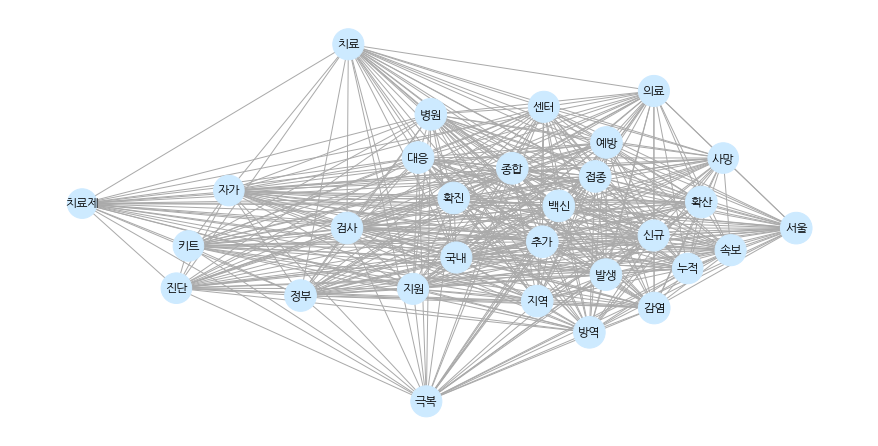

<<table_3 이미지 저장 완료 >>


<Figure size 864x432 with 0 Axes>

In [37]:
## 노드 크기 결정
size = [G.nodes[node]['nodesize'] * 1000 for node in G]

options = {
    'node_color': '#CDEAFF',
    'edge_color': '#aaa',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

## 폰트 설정을 위한 font_manager import
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

## 폰트 설정
# plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc('font', family='NanumGothic') ## 글꼴

## 
nx.draw(G, 
        node_size=size,
        #pos=nx.spring_layout(G, k=5.2, iterations=100),
        pos=nx.spring_layout(G, k=10, iterations=100),
        #pos=nx.spring_layout(G),
        #pos=nx.shell_layout(G),
        **options,
        # font_family='Malgun Gothic',
        font_family='NanumGothic',
        #alpha=0.8,
        #cmap=plt.cm.cmap_d,
       )

ax = plt.gca()
# ax.collections[0].set_edgecolor('#eee')
plt.show()
plt.savefig('network.svg')
print('<<table_3 이미지 저장 완료 >>')